# Node Level Graph ML Application 

# "Graph Convolutional Neural Network for Node Classification"


The purpose of the code is to classify the nodes in a given graph based on their features and the graph's Edges using a GCN The output of the GCN is a single value for each node, which represents the node's activation or importance in the context of the graph.

In [21]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [23]:

def Node_Classification(Nodes, Edges, sizes):
  '''
    Parameters--
    Nodes:       A PyTorch tensor representing the features of each node in the graph.       
    Edges:      A PyTorch tensor representing the Edges in the graph.
    sizes:      A list of integers representing the sizes of each layer in the GCN. 
  '''
  adjacent_matrix  = torch.eye(len(Nodes))
  adjacent_matrix [Edges[:, 0], Edges[:, 1]] = 1
  adjacent_matrix [Edges[:, 1], Edges[:, 0]] = 1

  for i in range(len(sizes) - 1):
      layer = nn.Linear(sizes[i], sizes[i+1])
      Nodes = torch.sigmoid(layer(adjacent_matrix  @ Nodes))  # @ -> Matrix Multiplication 

  return Nodes

* The function first constructs an adjacent_matrix for the graph using the torch.eye function to initialize a matrix with ones on the diagonal and zeros elsewhere. 

* It then sets the values of the matrix to 1 for each edge in the edges tensor. The adjacent_matrix is a representation of the graph structure that the GCN operates on.

* The function then iterates over the layers in the GCN, creating a linear transformation layer for each layer using the nn.Linear function. 

* The torch.sigmoid function is then applied to the result of the linear transformation of the adjacent_matrix and the node features (adjacent_matrix  @ vertices) to produce the output of each layer.

The final output of the function is the result of applying all the layers to the input node features.


# Pass 'Node_Classification' Parameters

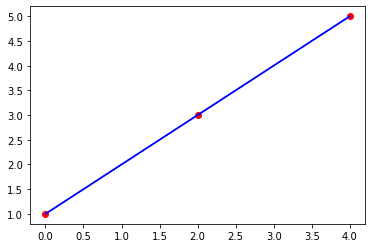

In [24]:
# Define Node

# In this example, each node has two features represented as a 2-dimensional tensor.

Nodes = torch.tensor([[0, 1.0], [2.0, 3.0], [4.0, 5.0]])


# Define Edges

# Each row of Edges represents an edge between two nodes, 
# where the two elements in the row are the indices of the nodes in the Node tensor.
 
Edges = torch.tensor([[0, 1], [1, 2], [2, 0]])

# define sizes 

# The first integer in the list is the size of the input layer (i.e., the number of features per node)
# The integers in between are the sizes of the hidden layers.
# The last integer is the size of the output layer, 

sizes = [2, 4, 1]

# Create plot
fig, ax = plt.subplots()

# Plot vertices
ax.scatter(Nodes[:,0], Nodes[:,1], color='r')

# Plot edges
for edge in Edges:
    ax.plot(Nodes[edge, 0], Nodes[edge, 1], color='b')

# Show plot
plt.show()


In [25]:
# Compute output
output = Node_Classification(Nodes, Edges, sizes)
print(output)

tensor([[0.5308],
        [0.5308],
        [0.5308]], grad_fn=<SigmoidBackward0>)


 The output of the function is a PyTorch tensor representing the output of the GCN for each node in the graph.

The output of the GCN for each node in the input graph is a value between 0 and 1 that represents the node's activation or importance in the context of the graph.

In this particular example, the output tensor tensor([[0.5308], [0.5308], [0.5308]], grad_fn=<SigmoidBackward0>) indicates that all three nodes in the input graph have similar activations, with a value of around 0.53. 

Since the node value are more than 0.50. We can tell all the nodes have equal importance 

Generally, the sigmoid activation function used in the GCN model maps the output of the linear transformation to a value between 0 and 1, which can be interpreted as a probability-like measure of the node's importance. Therefore, a higher output value would indicate that the node has a stronger activation or is more important in the context of the graph.

It's worth noting that the output of the GCN is dependent on the specific input graph and feature information, as well as the parameters and architecture of the GCN model. Therefore, the interpretation of the output may vary depending on the specific application and data.








